---
# K-Neighbors Regressor

---

**A regressão KNeighbors consiste em realizar previsões através da interpolação local dos dados associados aos vizinhos mais próximos no conjunto de treinamento, ou seja, dado um objeto desconhecido, procurar pelos k vizinhos mais próximos a ele em um conjunto de dados previamente conhecido, segundo uma medida de distância pré-estabelecida.**





In [115]:
# --------------------- IMPORTANDO BIBLIOTECA ----------------------
%matplotlib inline
!pip install mglearn
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import mglearn 
from sklearn.neighbors import KNeighborsRegressor
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

from sklearn.metrics import r2_score

## Separando os dados que serão treinados e os que serão testados 

O método usado para essa separação de dados é o RANDOM_SEED

In [116]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [117]:
dados = pd.read_excel("HappinessAlcoholConsumption.xls")


In [118]:
X =  dados[['HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']]
y = dados["HappinessScore"]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=RANDOM_SEED)

# Função Acurácia

In [120]:
# --------------- DEF para acuracia --------------- 
def Erro(y_previsto,y_base_teste):
    lista_erro = []
    for i,e in zip(y_previsto,y_base_teste):
        if i < e:
            dif = e-i
            lista_erro.append(dif)
        else: 
            dif = i-e
            lista_erro.append(dif)
    return lista_erro

def Classificador(lista_erro):
    lista_classificacao = []
    for erros in lista_erro:
        if erros<0.5:
            classifica = 'Certo'
            lista_classificacao.append(classifica)
        else:
            classifica = 'Errado'
            lista_classificacao.append(classifica)
    return lista_classificacao 

def Acuracia(Classificador,Erro,y_predict,y_test):
    data = {
    'Y_predict': y_predict,
    'Y_test': y_test,
    'Erro': Erro, 
    'Classificação': Classificador,
    }
    tabela = pd.DataFrame(data, columns=['Y_predict', 'Y_test','Erro','Classificação'])
    tabela.head(5)
    contador=0
    for c in Classificador: 
        if c == "Certo": 
            contador+=1
    acertou=(contador/len(Classificador))*100
    return acertou 

---
# Aplicando a Regressão K-Neighbors

---

Nessa primeira aplicação os dados usados para prever o Happiness Score nos países, são: IDH, GPD PerCapita, Beer PerCapita, Spirit PerCapita, Wine PerCapita.

In [121]:
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

### Análise

Os paramêtros usados são os padrão. Então o número de vizinhos a serem usados para os calculos é 5, ou seja, o número padrão. O algoritimo "auto" que tentará decidir o algoritmo mais apropriado com base nos valores passados para o fit método. A métrica de distância utilizada é a Distância de Minkowski de ordem p, que tem a seguinte fórmula:


<img src="distancia.png" width="350">

### Previsão

Então após o treinamento, são calculados os valores previstos para os que fora deixados para teste.

In [122]:
y_predict = reg.predict(X_test)
y_predict

array([7.2824, 6.2248, 5.1072, 3.643 , 7.0554, 5.8292, 5.7534, 3.8306,
       5.4962, 6.875 , 5.7138, 3.9354, 6.348 ])

### Resultados

É feita a comparação com o que a regressão calculou e os valores reais, para ver o quanto essa regressão, dessa forma consegue prever o Happiness Score

In [124]:
erro = Erro(y_predict,y_test)
classificando = Classificador(erro)
acuraria = Acuracia(classificando,erro,y_predict,y_test)
print("A regressão Kneighbors acertou {0}%".format(acuraria))

A regressão Kneighbors acertou 61.53846153846154%


In [126]:
# R quadrado

r2_score(y_predict, y_test)

0.6930949881783779

**Tem-se então que a Regressão K-Neighbors acertou cerca de 61.54% com a sua previsão.**

---
# Primeira iteração

---

Nessa aplicação de K-Neighbors os dados que serão usados para o calculo da Happiness Score será o IDH e a GPD PerCapita.

Portanto os mesmo passos serão seguidos, porem apenas com a influência de dois dados da base

In [12]:
X2 =  dados[['HDI', 'GDP_PerCapita']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.1, random_state=RANDOM_SEED)

In [13]:
reg.fit(X_train2, y_train2)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [14]:
y_predict2 = reg.predict(X_test2)
y_predict2

array([7.152 , 5.4852, 6.0942, 3.643 , 7.1462, 5.1418, 5.5162, 3.8394,
       5.561 , 6.2494, 5.7628, 3.9354, 6.5374])

In [15]:
erro2 = Erro(y_predict2,y_test2)
classificando2 = Classificador(erro2)
acuraria2 = Acuracia(classificando2,erro2,y_predict2,y_test2)
print("A regressão Kneighbors acertou {0}%".format(acuraria2))

A regressão Kneighbors acertou 69.23076923076923%


In [127]:
# R quadrado

r2_score(y_predict2, y_test2)

0.748846564810462

### Conclusão

Nesse caso, a porcentagem de acerto foi de aproximadamente 69,23%, um aumento de 7,69% comparada com a primeira aplicação de K-Neighbors, dessa forma percebe-se que o IDH e o GPD PerCapita tem maior influência no Hapiness Score, pois conseguiram gerar um previsão melhor

---
# Passando log no GPD PerCapita

---

Outra tentativa de melhoria dos valores dados pela regressão é passando o log na coluna de dados de GPD PerCapita, pois percebeu-se, através da Análise Exploratória que esses dados tem um tendência a serem exponencias.

In [131]:
GPD= dados["GDP_PerCapita"]

In [132]:
dados.loc[:,"LOG_GPD"] = np.log(GPD)

In [133]:
dados.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,LOG_GPD
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,3.981157
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,4.380350
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,4.103139
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,4.261129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,3.771220


In [134]:
X3 =  dados[['HDI', 'LOG_GPD']]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.1, random_state=RANDOM_SEED)

In [135]:
reg.fit(X_train3, y_train3)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [136]:
y_predict3 = reg.predict(X_test3)
y_predict3

array([6.4564, 5.4852, 6.0942, 3.8938, 7.0992, 5.1418, 5.5162, 3.8178,
       5.561 , 6.4778, 6.2158, 4.0096, 6.5374])

In [137]:
erro3 = Erro(y_predict3,y_test3)
classificando3 = Classificador(erro3)
acuraria3 = Acuracia(classificando3,erro3,y_predict3,y_test3)
print("A regressão Kneighbors acertou {0}%".format(acuraria3))

A regressão Kneighbors acertou 53.84615384615385%


In [138]:
# R quadrado

r2_score(y_predict3, y_test3)

0.695920305819956

### Análise do resultado

A porcentagem de acerto foi de 53,85%, ou seja, diminuiu, mostrando que passar o log nesses dados nessa regressão não é um boa iteração, pois a previsão fica mais incerta.

## GPD PerCapita com as demais variaveis

In [140]:
X4 =  dados[['HDI', 'LOG_GPD', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']]
y4 = dados["HappinessScore"]

In [141]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.1, random_state=RANDOM_SEED)

In [142]:
reg.fit(X4_train, y4_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [143]:
y_predict4 = reg.predict(X4_test)
y_predict4

array([6.9122, 6.2248, 5.1072, 4.0006, 7.0554, 5.8292, 6.1482, 5.1322,
       5.4962, 6.875 , 5.7138, 3.891 , 6.348 ])

In [144]:
erro4 = Erro(y_predict4,y4_test)
classificando4 = Classificador(erro4)
acuraria4 = Acuracia(classificando4,erro4,y_predict4,y4_test)
print("A regressão Kneighbors acertou {0}%".format(acuraria4))

A regressão Kneighbors acertou 46.15384615384615%


In [145]:
# R quadrado

r2_score(y_predict4, y4_test)

0.5077726360060866

A porcentagem diminuiu ainda mais, comprovando a maior influência do IDH e do GPD PerCapita, comparado com os outros dados! E além diss, que a iteração do log não nos premite obter melhores aproximações nesse caso

# Analisando mais variáveis

Como forma de tentar melhorar a regressão, foram adicionadas mais variáveis de outras bases de dados, referentes ao ano de 2016, para ver a influência no Happiness Score!

As variáveis adicionadas foram: Mortalidade, Inflação, Criança por Mulher, Expectativa de Vida, Desemprego

Essas variáveis foram escolhidas, pois são de alta relevância e ver a influência de cada uma na felicidade da população de um país, pode gerar ações mais eficazes se o governo focar naquela que mais influência.


In [146]:
#lendo arquivos
mortalidade_infantil = pd.read_excel('child_mortality_0_5_year_olds_dying_per_1000_born.xlsx')
inflacao = pd.read_excel('inflation_annual_percent.xlsx')
crianca_p_mulher = pd.read_excel('children_per_woman_total_fertility.xlsx')
expectativa_vida = pd.read_excel('life_expectancy_years.xlsx')
desemprego = pd.read_excel('DadoDeDesemprego.xls', sheet_name="Data", skiprows=3)
#Colocar index e pegar o ano de 2016 - Mortalidade Infantil 
mort_infantil=mortalidade_infantil.set_index("country")
mort_infantil_2016 = mort_infantil.loc[:, [2016]]

#Colocar index e pegar o ano de 2016 - Inflação
infla=inflacao.set_index("country")
infla_2016 = infla.loc[:, [2016]]

#Colocar index e pegar o ano de 2016 -Criança por Mulher
crianca_mulher=crianca_p_mulher.set_index("country")
crianca_mulher_2016 = crianca_mulher.loc[:, [2016]]

#Colocar index e pegar o ano de 2016 - Expectativa de vida 
expec_vida=expectativa_vida.set_index("country")
expec_vida_2016 = expec_vida.loc[:, [2016]]

#Colocar index e pegar o ano de 2016 - Desemprego 
desemp_2016 = desemprego.loc[:, ["Country Name" ,"2016"]]
desemp_2016=desemp_2016.set_index("Country Name")
#juntando tabelas
df = mort_infantil_2016.join(infla_2016, how='inner', lsuffix='_mortalidade', rsuffix='_inflação')
df1 = df.join(crianca_mulher_2016, how="inner")
df1.columns = ['Mortalidade', 'Inflação', 'Criança p/ Mulher']
df2 = df1.join(expec_vida_2016, how="inner")
df2.columns = ['Mortalidade', 'Inflação', 'Criança p/ Mulher', 'Expec de Vida']
df3= df2.join(desemp_2016, how="inner")
df3.columns = ['Mortalidade', 'Inflação', 'Criança p/ Mulher', 'Expec de Vida', 'Desemprego']

#tirando valores nulos
df3=df3.dropna()
#lendo dados Felicidade e álcool 
dados = pd.read_excel("HappinessAlcoholConsumption.xls")

#Arrumando Index
dados_indice = dados.set_index("Country")
tudo= dados_indice.join(df3, how="inner")

In [147]:
tudo.head(2)

,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Mortalidade,Inflação,Criança p/ Mulher,Expec de Vida,Desemprego
Denmark,Western Europe,north,7.526,928,53.579,224,81,278,4.4,-0.0464,1.74,80.8,6.1807
Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,4.1,-0.5660,1.55,83.1,4.9179


In [148]:
X5 = tudo[["Mortalidade","HDI","GDP_PerCapita","Inflação","Criança p/ Mulher","Expec de Vida","Desemprego"]]
y5 = tudo["HappinessScore"]

In [149]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.1, random_state=RANDOM_SEED)

In [150]:
reg.fit(X_train5, y_train5)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [151]:
y_predict5 = reg.predict(X_test5)
y_predict5

array([7.1462, 5.8306, 6.7562, 7.1948, 5.6548, 5.5288, 5.4334, 5.8884])

In [152]:
erro5 = Erro(y_predict5,y_test5.values)
classificando5 = Classificador(erro5)
acuraria5= Acuracia(classificando5,erro5,y_predict5,y_test5)
print("A regressão Kneighbors acertou {0}%".format(acuraria5))

A regressão Kneighbors acertou 62.5%


In [153]:
# R quadrado

r2_score(y_predict5, y_test5)

0.6184047842572535

# Passando apenas o IDH

In [154]:
X6 = tudo[["HDI"]]
y6 = tudo["HappinessScore"]

In [155]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.1, random_state=RANDOM_SEED)

In [156]:
reg.fit(X_train6, y_train6)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [157]:
y_predict6 = reg.predict(X_test6)
y_predict6

array([7.0992, 5.5934, 6.4314, 7.1948, 5.8322, 5.5288, 5.5374, 5.5654])

In [159]:
erro6 = Erro(y_predict6,y_test6.values)
classificando6 = Classificador(erro6)
acuraria6= Acuracia(classificando6,erro6,y_predict6,y_test6)
print("A regressão Kneighbors acertou {0}%".format(acuraria6))

A regressão Kneighbors acertou 75.0%


In [161]:
# R quadrado

r2_score(y_predict6, y_test6)

0.4441786291577985

## Gráfico da predição pelos dados para o IDH

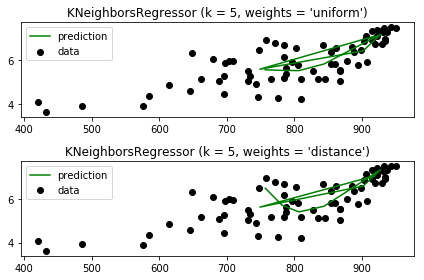

In [163]:
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X_train6, y_train6).predict(X_test6)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X_train6, y_train6, c='k', label='data')
    plt.plot(X_test6, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()